<a href="https://colab.research.google.com/github/srivas2001/Assignment2BDL_ME20B175/blob/main/MLE_Problem_Statement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Voice Activity Detection (VAD)
## Problem Statement

As a Machine Learning Engineer, you are tasked with developing a Voice Activity Detection (VAD) system that can accurately identify speech segments within audio recordings. This system will be crucial for various downstream applications including speech recognition, speaker diarization, and audio preprocessing pipelines. Please refer to this [link](https://speechprocessingbook.aalto.fi/Recognition/Voice_activity_detection.html) to understand VAD in some-detail.

### Background
Voice Activity Detection (VAD) is a technique used to detect the presence or absence of human speech in audio signals. It plays a fundamental role in many speech processing applications by:
- Identifying regions containing speech vs. non-speech
- Reducing computational overhead for downstream tasks
- Improving the overall quality of speech processing systems

### Dataset
We have provided you with a dataset containing 50 audio files [gdrive link](https://drive.google.com/drive/folders/16aDrBfFCMAElYVo8NtfYITIG2Nth-ukT?usp=sharing) on which you have to run your VAD system and collate the results in jsonl file. More on this later. Note that this dataset is unlabelled and too small to train or fine-tune any system.

### [Hint] Implementation Approaches
Here are some suggested approaches with increasing levels of complexity. These are meant as hints to get you started - feel free to explore and implement your own creative solutions that might work better for the given problem:

#### Approach 1: Statistical Energy-based VAD
- Implementation using basic signal processing techniques (Hint: GPT can give readymade code for these :P!)
- Features to consider:
  - Short-term energy
  - Zero-crossing rate
  - Root mean square (RMS) energy
- Advantages:
  - Lightweight implementation
  - No pre-trained model required
  - Fast execution
- Challenges:
  - May struggle with varying noise conditions
  - Less robust compared to ML-based approaches

#### Approach 2: Machine Learning-based VAD
- Options include:
  - [WebRTC VAD](https://github.com/wiseman/py-webrtcvad) (bit old, yet popular GMM-based approach)
  - Deep learning models (any open-source pretrained model - [silero-VAD](https://github.com/snakers4/silero-vad), [pyannote-VAD](https://huggingface.co/pyannote/voice-activity-detection), etc. )
- Advantages:
  - Off the shelf model and implementation
  - More robust to different acoustic conditions
  - Better generalization
- Challenges:
  - Less interpretable
  - More computational resources

#### Approach 3: Denoiser + VAD Pipeline
- Two-stage approach:
  1. Audio denoising/enhancement
  2. VAD system (either statistical or ML-based)
- Denoising options:
  - Traditional DSP methods
  - Deep learning denoisers (here also there are plenty of deep-learning based denoisers available, like [CleanUNet](https://github.com/NVIDIA/CleanUNet), [DeepFilterNet](https://github.com/Rikorose/DeepFilterNet), [facebook's denoiser](https://github.com/facebookresearch/denoiser) etc.)
- Advantages:
  - Most robust solution
  - Better performance in noisy conditions
- Challenges:
  - Most complex implementation
  - Higher computational requirements
  - Potential latency issues

### Evaluation Criteria

Your submission will be evaluated based on:

1. **System Performance [Primary Criterion]**
   - Accuracy of speech detection on provided audio samples
   - Automated evaluation script will be used to assess VAD performance
   - Initial shortlisting will be based solely on detection accuracy scores

2. **Code Quality**
   - Readability and documentation
   - Audio Analysis and visualization
   - Error handling

3. **Analysis Quality**
   - Depth of performance analysis
   - Insight into limitations
   - Quality of suggested improvements


### Timeline and Submission Requirements

#### Time Limit
- Total time allocated: 2 hours and 45 minutes
- Plan your implementation strategy accordingly to ensure completion of all deliverables

#### Submission Checklist

You need to submit the link to Colab Notebook and upload the jsonl file through the [google form](https://forms.gle/o5PHttJumxjMQ5vU9).

1. **Google Colab Notebook**
   - Complete implementation with analysis
   - Ensure sharing permissions are set to allow access for abhigyan@sarvam.ai and gokul@sarvam.ai
   - Verify the notebook runs end-to-end without errors
   - You will also need to download the .ipynb file from the Colab and upload it separately in the form

2. **JSONL Output Files**
   - Generate results for all provided audio samples
   - Validate output format using the provided validation script
   - DO NOT submit without running the validation script
   - More details about output format is described in the next section
   ```json
   {
     "filename": "audio_001.wav",
     "duration": 10.5,
     "chunks": [
       {
         "start": 0.0,
         "end": 2.3
       },
       {
         "start": 4.1,
         "end": 7.8
       }
     ]
   }
   ```

### Dos and Don'ts

#### Permitted
- ✅ Use of any open-source libraries or models
- ✅ Use of AI code assistants (ChatGPT, Claude, Gemini, etc.)

#### Not Permitted
- ❌ Use of external APIs (free or paid)
- ❌ Sharing of assignment document or dataset with anyone

#### Confidentiality
- The assignment document, dataset, and evaluation criteria are confidential
- Keep all provided materials strictly private
- Submit your work only through the specified channels

### Additional Considerations

- Consider real-time processing capabilities
- Document any external dependencies
- Provide clear installation instructions
- Include error handling for edge cases
- Document any assumptions made

Remember to focus on both functionality and code quality while maintaining clear documentation of your design choices and analysis.


>PRO-TIP: Start with the first iteration of the code which is fastest to implement. This allows you to have a working baseline quickly and then iterate to improve performance based on your analysis.


# VAD System Output Format Specification

You are required to submit your VAD system results in a single JSONL file with the following specification.

## Input Dataset Structure
```
dataset/
├── audio_001.wav
├── audio_002.wav
├── audio_003.wav
...
└── audio_050.wav
```
> Note that this is just an example, actual dataset names could be different

## Output Format Specification
The system should process each audio file and produce a JSONL (JSON Lines) file where each line contains:

1. `filename`: String - Name of the processed audio file
2. `duration`: Float - Total duration of the audio in seconds
3. `chunks`: Array of objects containing:
   - `start`: Float - Start time of speech segment in seconds
   - `end`: Float - End time of speech segment in seconds

## Example Output (results.jsonl)
```jsonl
{"filename": "audio_001.wav", "duration": 45.23, "chunks": [{"start": 0.0, "end": 2.34}, {"start": 3.45, "end": 15.67}, {"start": 18.23, "end": 25.78}]}
{"filename": "audio_002.wav", "duration": 32.45, "chunks": [{"start": 1.23, "end": 5.67}, {"start": 8.90, "end": 12.34}]}
{"filename": "audio_003.wav", "duration": 60.00, "chunks": [{"start": 0.5, "end": 10.23}, {"start": 15.67, "end": 25.89}, {"start": 40.12, "end": 55.45}]}
```

## Validation Script
To ensure the output format is correct:

```python
import json
import jsonschema

# JSON Schema for validation
schema = {
    "type": "object",
    "properties": {
        "filename": {"type": "string"},
        "duration": {"type": "number", "minimum": 0},
        "chunks": {
            "type": "array",
            "items": {
                "type": "object",
                "properties": {
                    "start": {"type": "number", "minimum": 0},
                    "end": {"type": "number", "minimum": 0}
                },
                "required": ["start", "end"],
                "additionalProperties": false
            }
        }
    },
    "required": ["filename", "duration", "chunks"],
    "additionalProperties": false
}

def validate_output(jsonl_file):
    with open(jsonl_file, 'r') as f:
        for line_num, line in enumerate(f, 1):
            try:
                data = json.loads(line)
                jsonschema.validate(instance=data, schema=schema)
                
                # Additional validation
                for chunk in data['chunks']:
                    assert chunk['start'] < chunk['end'], f"Invalid timing in {data['filename']}"
                    assert chunk['end'] <= data['duration'], f"Chunk end time exceeds duration in {data['filename']}"
                
            except (json.JSONDecodeError, jsonschema.exceptions.ValidationError, AssertionError) as e:
                print(f"Error in line {line_num}: {str(e)}")
                return False
    return True

# Usage
is_valid = validate_output('results.jsonl')
print(f"Output format is {'valid' if is_valid else 'invalid'}")
```

## Batch Processing Script
Here's a template for processing multiple audio files and generating the JSONL output:

```python
import os
import json
import librosa
from typing import List, Dict
from pathlib import Path

def process_audio_file(audio_path: str, vad_model) -> Dict:
    """Process a single audio file and return VAD results."""
    # Load audio
    audio, sr = librosa.load(audio_path, sr=None)
    duration = librosa.get_duration(y=audio, sr=sr)
    
    # Run VAD and get chunks
    chunks = vad_model.detect(audio, sr)
    
    return {
        "filename": os.path.basename(audio_path),
        "duration": duration,
        "chunks": chunks
    }

def process_dataset(
    audio_dir: str,
    output_file: str,
    vad_model
) -> None:
    """Process all audio files and write results to JSONL file."""
    audio_files = list(Path(audio_dir).glob("*.wav"))
    
    with open(output_file, 'w') as f:
        for audio_path in audio_files:
            result = process_audio_file(str(audio_path), vad_model)
            f.write(json.dumps(result) + '\n')

# Usage
process_dataset(
    audio_dir="dataset/",
    output_file="results.jsonl",
    vad_model=your_vad_model  # Your VAD model instance
)
```


In [41]:
!pip install webrtcvad
!pip install speechbrain #Required dependencies
!pip install silero

In [42]:
import os
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Ensure the 'audio' folder exists
if not os.path.exists('audio'):
    os.makedirs('audio')

# Check contents of 'audio' folder
print(os.listdir('audio'))

['data_vad']


In [43]:
import zipfile

with zipfile.ZipFile('/content/data_vad-20241123T084858Z-001.zip', 'r') as zip_ref: #Get all data copied to audio folder.
    zip_ref.extractall('audio')

In [44]:
from IPython.display import Audio
import librosa
import matplotlib.pyplot as plt
import numpy as np
# Load 1 sample audio file using librosa
audio_data, sr = librosa.load('audio/data_vad/0.wav', sr=16000)  # sr=None to preserve original sampling rate

# Play audio



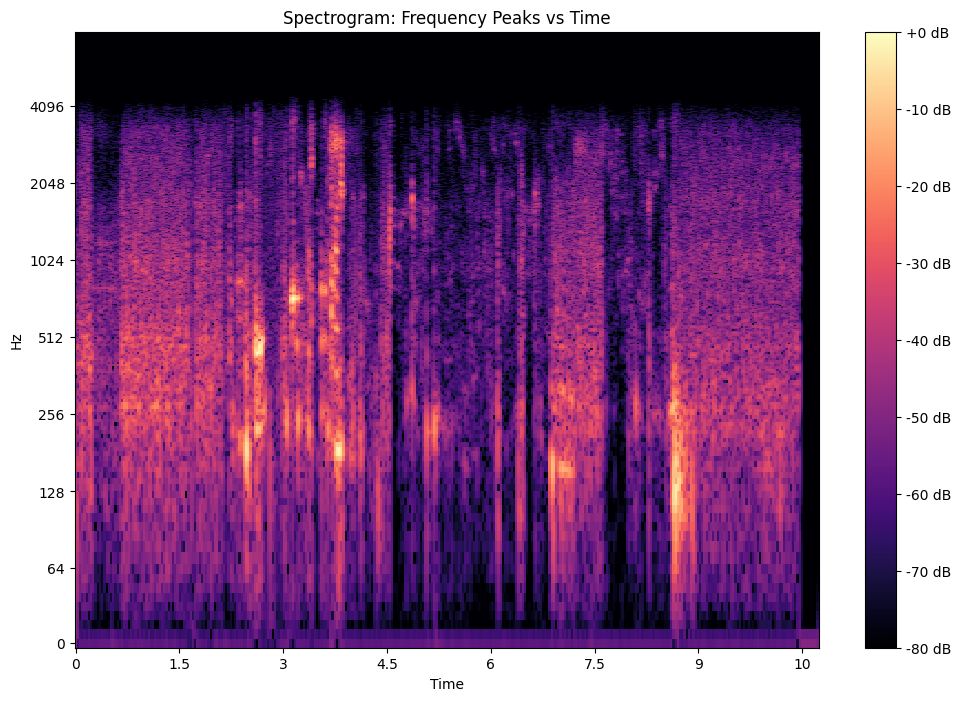

In [45]:
D = librosa.stft(audio_data) #Perform short time fourier transform on the data for checking the frequencies of noise

# Convert amplitude to decibels for better visualization
DB = librosa.amplitude_to_db(np.abs(D), ref=np.max)

# Plot the spectrogram (frequency vs time)
plt.figure(figsize=(12, 8))
librosa.display.specshow(DB, sr=16000, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram: Frequency Peaks vs Time')
plt.show()

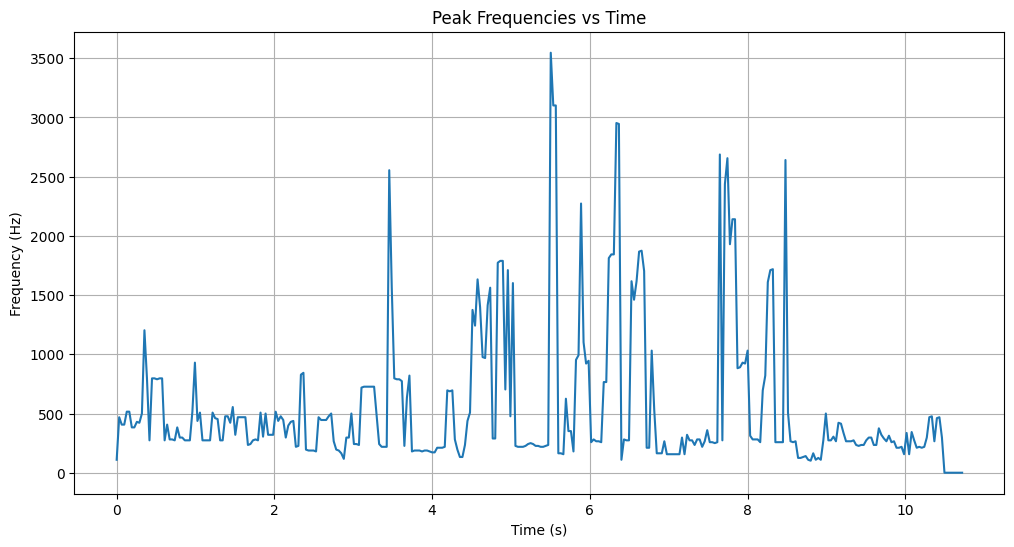

In [46]:
magnitude = np.abs(D)

# Find the frequency with the maximum magnitude at each time frame
peaks = np.argmax(magnitude, axis=0)

# Convert the peaks from index to actual frequency (in Hz)
frequencies = librosa.fft_frequencies(sr=sr)
peak_frequencies = frequencies[peaks]

# Create time vector (corresponding to the time of each frame)
times = librosa.frames_to_time(np.arange(len(peak_frequencies)), sr=sr)

# Plot the peak frequencies vs time
plt.figure(figsize=(12, 6))
plt.plot(times, peak_frequencies, label="Peak Frequency", color='tab:blue')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Peak Frequencies vs Time')
plt.grid(True)
plt.show()

In [47]:
from speechbrain.inference.separation import SepformerSeparation as separator
import torchaudio

model = separator.from_hparams(source="speechbrain/sepformer-wham-enhancement", savedir='pretrained_models/sepformer-wham-enhancement',run_opts={"device":"cuda"})

# for custom file, change path



/usr/local/lib/python3.10/dist-packages/speechbrain/utils/checkpoints.py:200: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(path, map_location=device

In [48]:
est_sources = model.separate_file(path='audio/data_vad/0.wav')

torchaudio.save("enhanced_0.wav", est_sources[:, :, 0].detach().cpu(), 8000)
waveform, sample_rate = torchaudio.load("enhanced_0.wav")

# Play the loaded audio
Audio(waveform.numpy(), rate=sample_rate) #Here output is the denoised waveform.

Resampling the audio from 16000 Hz to 8000 Hz


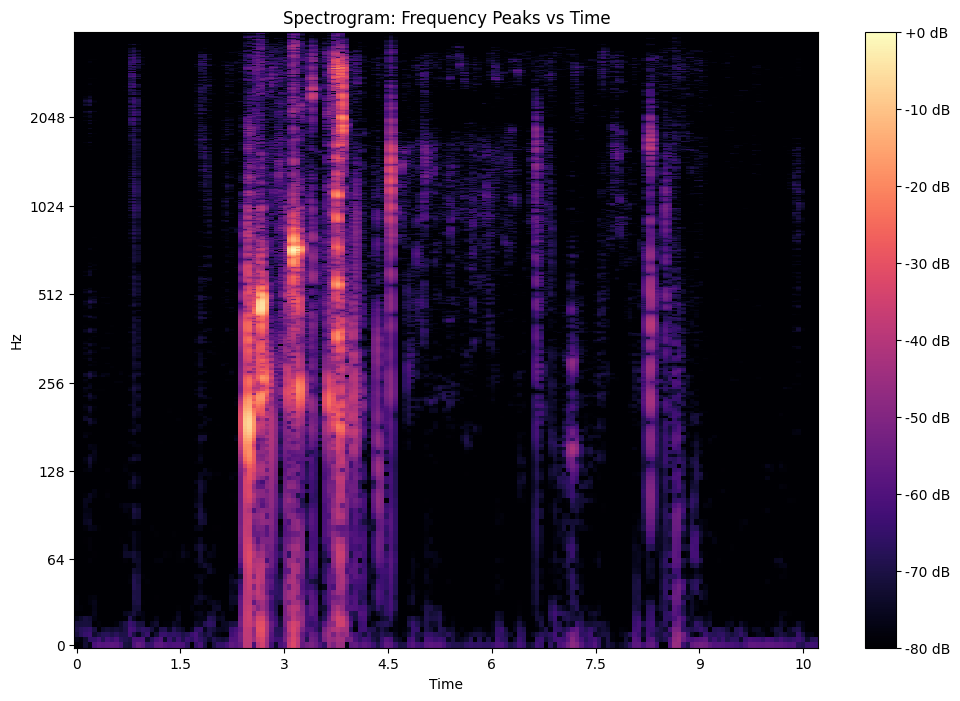

In [14]:
waveform, sr = librosa.load('enhanced_0.wav', sr=8000)
D = librosa.stft(waveform) #Perform short time fourier transform on the data for checking the frequencies of noise

# Convert amplitude to decibels for better visualization
DB = librosa.amplitude_to_db(np.abs(D), ref=np.max)

# Plot the spectrogram (frequency vs time)
plt.figure(figsize=(12, 8))
librosa.display.specshow(DB, sr=8000, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram: Frequency Peaks vs Time')
plt.show()

You can notice that the above model taken from speech brain almost removes all of the noise


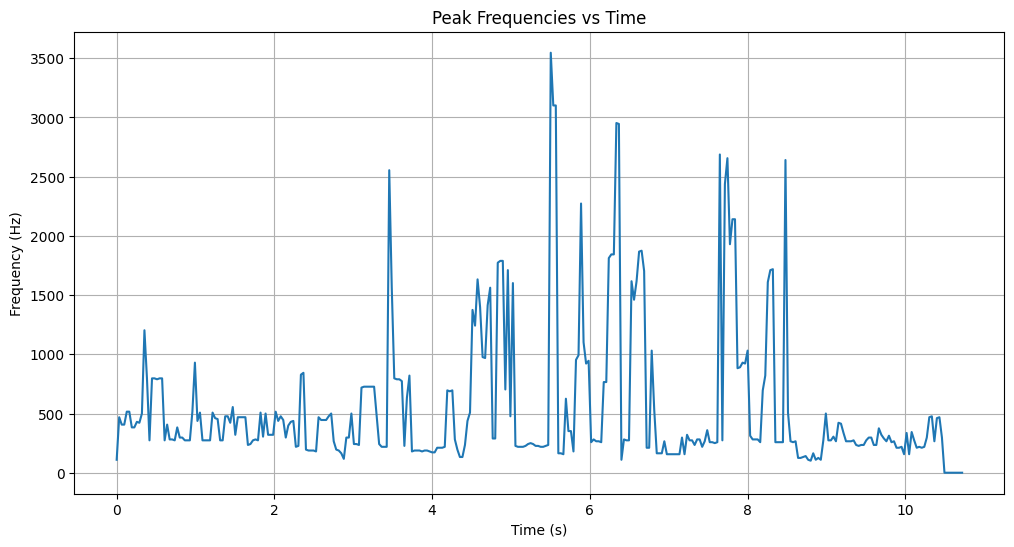

In [49]:
magnitude = np.abs(D)

# Find the frequency with the maximum magnitude at each time frame
peaks = np.argmax(magnitude, axis=0)

# Convert the peaks from index to actual frequency (in Hz)
frequencies = librosa.fft_frequencies(sr=sr)
peak_frequencies = frequencies[peaks]

# Create time vector (corresponding to the time of each frame)
times = librosa.frames_to_time(np.arange(len(peak_frequencies)), sr=sr)

# Plot the peak frequencies vs time
plt.figure(figsize=(12, 6))
plt.plot(times, peak_frequencies, label="Peak Frequency", color='tab:blue')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Peak Frequencies vs Time')
plt.grid(True)
plt.show()

In [50]:
from speechbrain.inference.VAD import VAD
import torchaudio.transforms as T

VAD = VAD.from_hparams(source="speechbrain/vad-crdnn-libriparty", savedir="pretrained_models/vad-crdnn-libriparty")

# Load the audio file
def filtering(file_path,name):
    est_sources = model.separate_file(path=file_path)
    output=f"{name}.wav"
    torchaudio.save(output, est_sources[:, :, 0].detach().cpu(), 16000)
    return output
def boundaries_val(file_path,name):
    overall={}
    waveform, sample_rate = torchaudio.load(file_path)

# Calculate duration (in seconds)
    duration = waveform.size(1) / sample_rate
    boundaries = VAD.get_speech_segments(file_path)
# Make sure the sample rate matches with the VAD's expected sample rate (typically 16 kHz)
    boundaries=boundaries.tolist()
    start_end=[]
    for i in range(len(boundaries)):
        map={}
        map['start']=boundaries[i][0]
        map['end']=boundaries[i][1]
        start_end.append(map)
    overall['filename']=name
    overall['duration']=duration
    overall['chunks']=start_end
    return overall

#{"filename": "audio_001.wav", "duration": 45.23, "chunks": [{"start": 0.0, "end": 2.34}, {"start": 3.45, "end": 15.67}, {"start": 18.23, "end": 25.78}]}



/usr/local/lib/python3.10/dist-packages/speechbrain/processing/features.py:1311: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  stats = torch.load(path, map_location=device)


In [55]:
data=[]
i=0
for filename in os.listdir('/content/audio/data_vad'):
    file_path = os.path.join('/content/audio/data_vad', filename)
    if file_path.endswith(".wav"):  # Check for .wav files
        path=filtering(f'/content/audio/data_vad/{i}.wav',f'{i}')
    dict_san=boundaries_val(path,f'{i}.wav')
    i+=1
    data.append(dict_san)


Resampling the audio from 16000 Hz to 8000 Hz
Resampling the audio from 16000 Hz to 8000 Hz


OutOfMemoryError: CUDA out of memory. Tried to allocate 3.35 GiB. GPU 0 has a total capacity of 14.75 GiB of which 1.20 GiB is free. Process 195907 has 13.55 GiB memory in use. Of the allocated memory 10.07 GiB is allocated by PyTorch, and 3.35 GiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [56]:
import json

# Path to the output .jsonl file
output_file = 'audio_data.jsonl'

# Open the file in write mode
with open(output_file, 'w') as f:
    for entry in data:
        # Convert each dictionary to a JSON string and write it as a line
        json.dump(entry, f)
        f.write("\n")